# 3.4 classifying movie reviews: (IMDB dataset)
## first: Binary Classification

Loading the IMDB dataset

In [ ]:
# run this
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [5]:
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000) #top 10000 most frequently occuring words

print('input example',train_data[0])
print('label example',train_labels[0])

input example [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
label example 1


Encoding the integer sequences into a binary matrix

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


print("train date",x_train[0])

# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

train date [0. 1. 1. ... 0. 0. 0.]


The model definition

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Setting aside a validation set

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [14]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 241ms/step - loss: 0.5282 - accuracy: 0.7890 - val_loss: 0.4215 - val_accuracy: 0.8471
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3140 - accuracy: 0.9057 - val_loss: 0.3161 - val_accuracy: 0.8799
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2259 - accuracy: 0.9269 - val_loss: 0.2801 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1777 - accuracy: 0.9445 - val_loss: 0.2747 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1430 - accuracy: 0.9545 - val_loss: 0.3005 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1187 - accuracy: 0.9621 - val_loss: 0.3227 - val_accuracy: 0.8769
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0978 - accuracy: 0.9713 - val_loss: 0.3194 - val_accuracy: 0.8787
Epoch 8/20
3

Show results

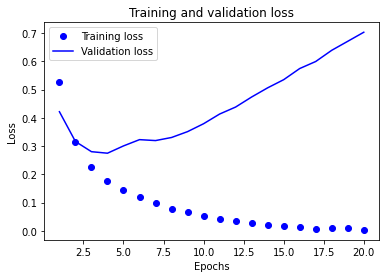

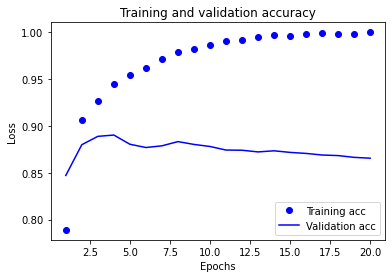

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

One Hidden layer is deleted to see result (ONE Hidden layer)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5053 - accuracy: 0.8045 - val_loss: 0.4029 - val_accuracy: 0.8670
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3321 - accuracy: 0.8983 - val_loss: 0.3361 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2594 - accuracy: 0.9195 - val_loss: 0.3144 - val_accuracy: 0.8746
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2145 - accuracy: 0.9324 - val_loss: 0.2888 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1821 - accuracy: 0.9439 - val_loss: 0.2742 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1574 - accuracy: 0.9530 - val_loss: 0.2874 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1375 - accuracy: 0.9601 - val_loss: 0.2757 - val_accuracy: 0.8894
Epoch 8/20
30

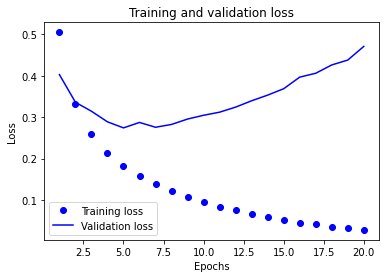

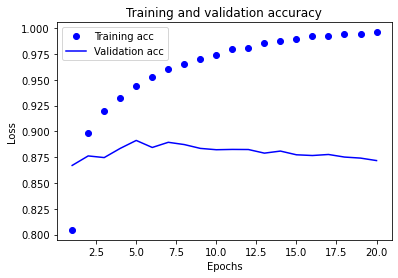

In [23]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Three Hidden layer

Epoch 1/20
30/30 [==============================] - 3s 79ms/step - loss: 0.5268 - accuracy: 0.7956 - val_loss: 0.4082 - val_accuracy: 0.8496
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3044 - accuracy: 0.8970 - val_loss: 0.2983 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2116 - accuracy: 0.9293 - val_loss: 0.2753 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1660 - accuracy: 0.9432 - val_loss: 0.2798 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1312 - accuracy: 0.9582 - val_loss: 0.3011 - val_accuracy: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1082 - accuracy: 0.9644 - val_loss: 0.3243 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0899 - accuracy: 0.9711 - val_loss: 0.3960 - val_accuracy: 0.8710
Epoch 8/20
30

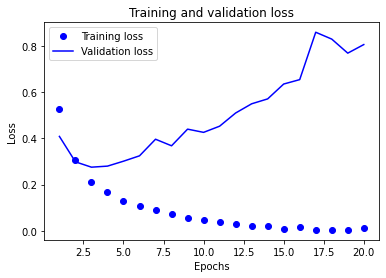

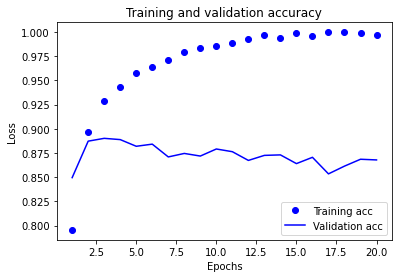

In [24]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5070 - accuracy: 0.7864 - val_loss: 0.3987 - val_accuracy: 0.8373
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2763 - accuracy: 0.9087 - val_loss: 0.3039 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2013 - accuracy: 0.9297 - val_loss: 0.2758 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1572 - accuracy: 0.9485 - val_loss: 0.2806 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1286 - accuracy: 0.9573 - val_loss: 0.3195 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1034 - accuracy: 0.9675 - val_loss: 0.3200 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0875 - accuracy: 0.9711 - val_loss: 0.3433 - val_accuracy: 0.8793
Epoch 8/20
30

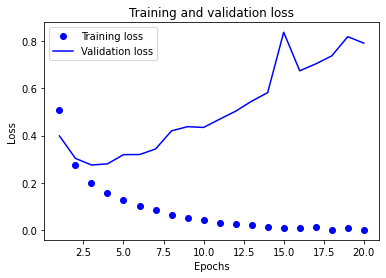

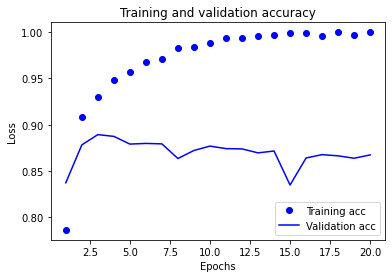

In [25]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

With MSE loss

Epoch 1/20
30/30 [==============================] - 3s 78ms/step - loss: 0.1718 - accuracy: 0.7866 - val_loss: 0.1225 - val_accuracy: 0.8620
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0908 - accuracy: 0.9072 - val_loss: 0.0935 - val_accuracy: 0.8893
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0654 - accuracy: 0.9289 - val_loss: 0.0851 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0510 - accuracy: 0.9469 - val_loss: 0.0850 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0409 - accuracy: 0.9583 - val_loss: 0.0828 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0333 - accuracy: 0.9677 - val_loss: 0.0902 - val_accuracy: 0.8770
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0288 - accuracy: 0.9724 - val_loss: 0.0890 - val_accuracy: 0.8785
Epoch 8/20
30

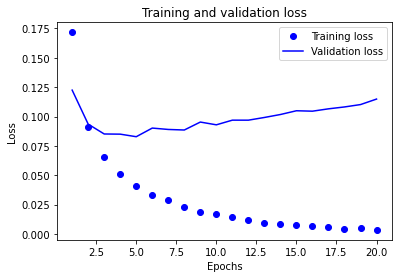

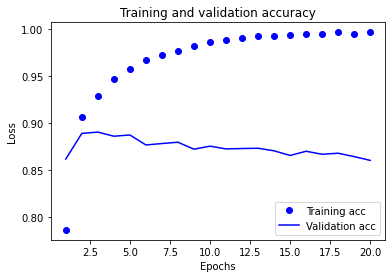

In [26]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.4730 - accuracy: 0.7950 - val_loss: 0.3458 - val_accuracy: 0.8752
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2696 - accuracy: 0.9075 - val_loss: 0.2815 - val_accuracy: 0.8892
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1926 - accuracy: 0.9329 - val_loss: 0.2681 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1467 - accuracy: 0.9487 - val_loss: 0.2786 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1119 - accuracy: 0.9634 - val_loss: 0.3056 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0847 - accuracy: 0.9730 - val_loss: 0.3414 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0666 - accuracy: 0.9796 - val_loss: 0.3798 - val_accuracy: 0.8775
Epoch 8/20
30

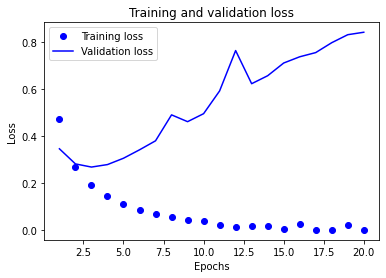

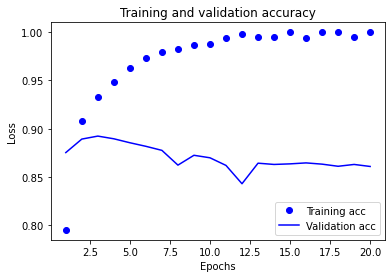

In [27]:
model = models.Sequential()

model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()